# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Analysis
1) Temperatures increase as the Latitude gets closer to zero. Presently, temperatures are very similar in the northern and southern hemispheres for their respective |Latitude|. The southern hemisphere is beginning spring (start in Sept) and the northern hemisphere is beginning fall(start in late September).

2) Wind speeds and cloudiness look like they have weak or nonexistent relationship with Latitude. Though, wind speeds have more outliers as the distance from the equator increases.

3) Humidity looks like it increases as we get closer to the equator and the range of humidity increases as |latitude| increases.

*Note: When this analysis was conducted 10/18/19 represents a time of the year where the northern and southern hemispheres are similarly distant from summer & winter. Differences would likely be much more pronounced in December or July, when one hemishpere is in summer and the other is in winter.



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# URL for API call. Incorporated Imperial units
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [5]:
# Create empty lists to append info into from the API call
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [6]:
# Start the record and set counters
record = 1
set_num = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop through the cities in the city list, retrieve data and append lists
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_in_loop = response["name"]
        print(f"Processing Record {record} of Set {set_num} | {city_in_loop}")
        
        # Increase record counter by one 
        record= record + 1
        # If once record gets to 51(on 50th record) reset record to 1 and add 1 to set number
        if record == 51:
            record=1
            set_num = set_num + 1
        
    # Skip to next if no record found and print "City not found..."
    except:
        print("City not found. Skipping...")
    continue
print('---------------------')
print('Data Retrieval Complete')
print('---------------------')

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Severodvinsk
Processing Record 2 of Set 1 | Hobart
Processing Record 3 of Set 1 | Viedma
Processing Record 4 of Set 1 | Mogadishu
Processing Record 5 of Set 1 | Chumikan
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Saint Leonard
Processing Record 8 of Set 1 | Saint-Pierre
Processing Record 9 of Set 1 | Kamiiso
Processing Record 10 of Set 1 | Chokurdakh
City not found. Skipping...
Processing Record 11 of Set 1 | Hervey Bay
City not found. Skipping...
Processing Record 12 of Set 1 | Dikson
Processing Record 13 of Set 1 | Albany
City not found. Skipping...
Processing Record 14 of Set 1 | Nikolskoye
Processing Record 15 of Set 1 | Kavieng
Processing Record 16 of Set 1 | Itarema
City not found. Skipping...
Processing Record 17 of Set 1 | San Quintin
Processing Record 18 of Set 1 | Cherskiy
Processing Record 19 of Set 1 | Taoudenni
Processing Record 20 of Set 1 | Ahipara
Processin

Processing Record 30 of Set 4 | Kodinsk
Processing Record 31 of Set 4 | Klaksvik
Processing Record 32 of Set 4 | Meulaboh
Processing Record 33 of Set 4 | Ambilobe
Processing Record 34 of Set 4 | Oliveira
Processing Record 35 of Set 4 | Vavoua
Processing Record 36 of Set 4 | Lazaro Cardenas
Processing Record 37 of Set 4 | Skjervoy
Processing Record 38 of Set 4 | Saint-Ambroise
Processing Record 39 of Set 4 | Horsens
Processing Record 40 of Set 4 | Taungdwingyi
Processing Record 41 of Set 4 | Jabinyanah
Processing Record 42 of Set 4 | Vardo
Processing Record 43 of Set 4 | Tonekabon
Processing Record 44 of Set 4 | Freeport
Processing Record 45 of Set 4 | Severo-Kurilsk
Processing Record 46 of Set 4 | Te Anau
Processing Record 47 of Set 4 | Cap Malheureux
Processing Record 48 of Set 4 | Acari
Processing Record 49 of Set 4 | Bandarbeyla
Processing Record 50 of Set 4 | Dongkan
Processing Record 1 of Set 5 | Cheremshanka
Processing Record 2 of Set 5 | Mayya
Processing Record 3 of Set 5 | Lisb

Processing Record 19 of Set 8 | Assiniboia
Processing Record 20 of Set 8 | Cruzeiro do Sul
Processing Record 21 of Set 8 | Santa Fe
Processing Record 22 of Set 8 | Nishihara
Processing Record 23 of Set 8 | Puerto Escondido
Processing Record 24 of Set 8 | Thessalon
Processing Record 25 of Set 8 | Shenjiamen
Processing Record 26 of Set 8 | Jacksonville Beach
Processing Record 27 of Set 8 | Longyearbyen
Processing Record 28 of Set 8 | Bukene
City not found. Skipping...
Processing Record 29 of Set 8 | Lagoa
Processing Record 30 of Set 8 | Mamallapuram
Processing Record 31 of Set 8 | Filingue
Processing Record 32 of Set 8 | Navirai
City not found. Skipping...
Processing Record 33 of Set 8 | Honningsvag
Processing Record 34 of Set 8 | Meshchovsk
Processing Record 35 of Set 8 | Noumea
Processing Record 36 of Set 8 | Lujan
Processing Record 37 of Set 8 | Vestmanna
City not found. Skipping...
Processing Record 38 of Set 8 | Punta Alta
Processing Record 39 of Set 8 | Extrema
Processing Record 40

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
weather_data_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_data_dict)

# Export city data into a csv
weather_data.to_csv ('Output/city_data.csv', index = None, header=True)
weather_data.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [11]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Severodvinsk,90,RU,1571442386,85,64.56,39.82,32.00,8.95
1,Hobart,75,AU,1571442386,53,-42.88,147.33,53.01,14.99
2,Viedma,0,AR,1571442386,72,-40.81,-62.99,50.36,7.20
3,Mogadishu,100,SO,1571442387,83,2.04,45.34,78.53,9.26
4,Chumikan,34,RU,1571442387,71,54.72,135.31,38.05,7.83


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

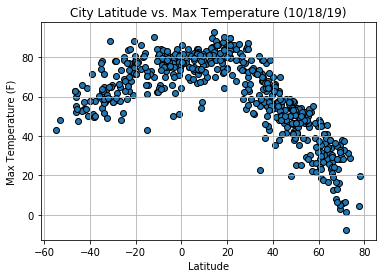

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black")

# Add Graph Properties
plt.title(f"City Latitude vs. Max Temperature (10/18/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/lat_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

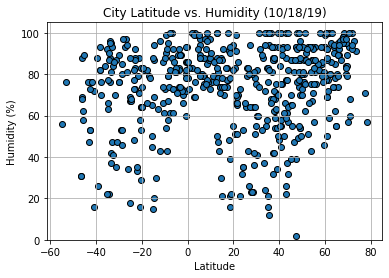

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black")

# Add Graph Properties
plt.title(f"City Latitude vs. Humidity (10/18/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Need to set Y Limit because theres a data point with 300% humidity 
plt.ylim(0, 105)
# Save the figure
plt.savefig("Output/lat_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

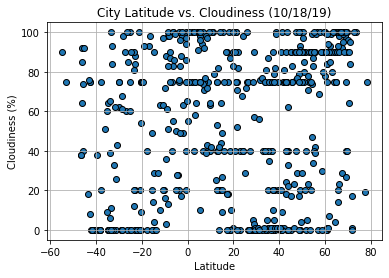

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="black")

# Add Graph Properties
plt.title(f"City Latitude vs. Cloudiness (10/18/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/lat_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

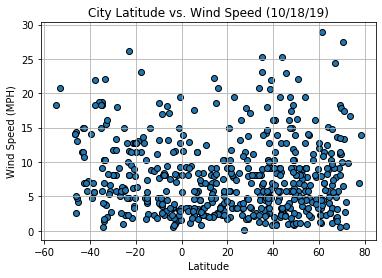

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black")

# Add Graph Properties
plt.title(f"City Latitude vs. Wind Speed (10/18/19)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/lat_wind_speed.png")

# Show plot
plt.show()